#Intro to Geopandas

Geopandas is a Python Library for geospatial data

Import it with its standard anbbreviation

In [1]:
# this is a library we will explore
import geopandas as gpd

# we will use for making map
import matplotlib.pyplot as plt
#libray.something else means we are importing a submodual of the library, not the entire libra

## Data

We will use simplified data about wild pig (*Sus Scrofa*) sightings in CA. 
Data is from the Global Biodiversity Information Facility (GBIF).

Read in the shapefile using the `geopandas` function gpd.read_file()

In [2]:
# read in data
pigs = gpd.read_file("data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp")

pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `Geoseries` and `GeoDataFrame`

Core data structure of Geopandas is `geopandas.GeodataFrame`

`geopandas.GeoDataFrame` = think of it as a `pandas.DataFrame` with a dedicated geometry col8mns

the **geometry column** in a `gpd.GeoDataFrame` holds the geometry (point, polygond, etc) of each spatial feature. This co;umn is of type `geopandas.GeoSeies`.

The other non-geometry columns in the geodataframe are our usial `pd.Seires` types


In [4]:
# type of pigs dataframe
print(type(pigs))

#type of geometry columns
print(type(pigs.geometry))

#type of gbifID columns
print(type(pigs.gbifID))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is reflected in the `dtypes`

In [5]:
# check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric Informatio

two other important attributes of a `gpd.GeoDataFrame` are its coordinate reference stystem (crs) and its extent

Think of the CRS as intructions to locate each feature on the surface of the earth

We can access the crs of the Geo=dataframe using the `crs` attribute

In [6]:
# access CRS

pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geodata frame is the bounding box covering all of the features in our geodataframe.

We access information to create the extend of a geodatafrae using the `total_bounds` attribute

In [7]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling
Geop andas is built on top of `pandas`, so almost everything we have learned about wrangling pandas data still applies here

**Example**

We only want to use recent data for the wild pig observations

In [9]:
# What years do we have?
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use out usial data selections

In [10]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

#print length of the original dataframe
print(len(pigs))

#print length of subset
print(len(pigs_recent))

pigs_recent

1046
606


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)
...,...,...,...,...,...,...,...,...,...,...,...,...
727,2563540650,Sus scrofa,California,NaN,20.0,1.0,2020.0,iNaturalist,Observations,37804173,Eric,POINT (-121.98693 37.87490)
728,2563520717,Sus scrofa,California,NaN,17.0,1.0,2020.0,iNaturalist,Observations,37758359,Jacob Martin,POINT (-122.00615 37.80658)
729,2563516057,Sus scrofa,California,NaN,18.0,1.0,2020.0,iNaturalist,Observations,37741027,Anne Parsons,POINT (-121.67951 37.32578)
730,2563508248,Sus scrofa,California,NaN,18.0,1.0,2020.0,iNaturalist,Observations,37723068,Anne Parsons,POINT (-121.67664 37.32354)


## PLotting

### `plot()`

`gpd.GeoDataFrame` has aplot method that we can call directly to create a quick view of the data

- The ggeospatial information will bbe automatically used to rceate the axes of the plot

**Example**
Quick plot of recent wild pigs sigtings

<AxesSubplot:>

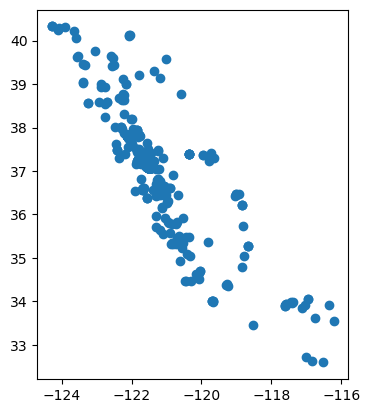

In [12]:
pigs_recent.plot()

### `matplotlib`'s `fig` and `ax`

We use `matplotlib` to creat more complex, customized graphs. In particular, maps.

We can interrat with `matplotlib` via its `pyplot` interface, which we imported as

```python
import matplotlib.pyplot as plt
```

`plt` refers only to pyplot and not all of matplotlib

Matplotlib graphs the data in a **figure** which can have one or more **axes**
The axis is *only* the area specified by the x-y axis and whatb is plotted in it.
To initialize a new blank figutr:

1. initialize a black figure and axes by calling `pyplot`'s `subplots()` function, and
2. show the graph using `plt.show()`

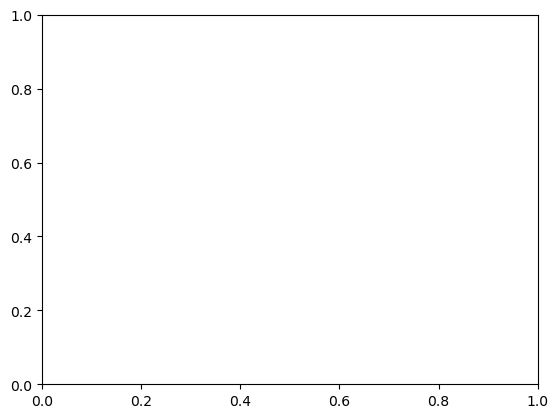

In [13]:
# create a blank figure*) and an empty axis
fig, ax = plt.subplots()

#display figutr
plt.show()


## Adding a layer

When using `matplotlib` it can be useful to think of creating a plot, as adding layers to an axis. 

The general syntax to plot a dataframe `df` into an axis is:

```python
# create a new figure
fig, ax = plt.subplots()

#plot df on the ax axis
df.plot(ax=ax,
       ...) # other arguments for plot functions(color, labels, ect)

#display figure
plt.show()
```

**Example**

The first layer we want to add to our axis is the `pigs_recent` point data

<function matplotlib.pyplot.show(close=None, block=None)>

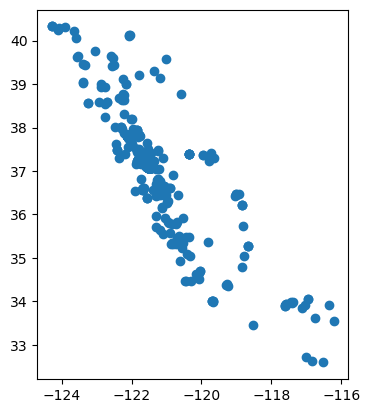

In [15]:
# create new figure and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# display figure
plt.show

### Customization

Matplot lib allows for a lot of customization.
Some can be done directly in the `plot()` fucntion, while other is done by updating the attributes of the axis

Some basic customization of our pigs data:

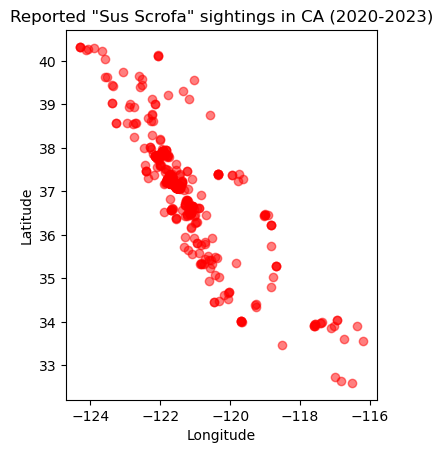

In [18]:
# initialize an empty figutr

fig, ax = plt.subplots()

#add data to axis
#notice customization happens as arguments in plot()
pigs_plot = pigs_recent.plot(ax=ax,
                alpha=0.5,
                color="red")

#update axis
#customization seperate from the data plotting
ax.set_title('Reported "Sus Scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()



## Exercise

1. Open the CA boundary shapefile and store as ca_boundary variable. How many features does it have?\
2. Add it to the pigs signtings graph so that the CA boundary appears behind the points

In [17]:
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

In [19]:
ca_boundary.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [30]:
#geom_type will show what kind of vector data is stired in each picture of the geometry column
ca_boundary.geom_type

0    MultiPolygon
dtype: object

Text(132.699971804565, 0.5, 'Latitude')

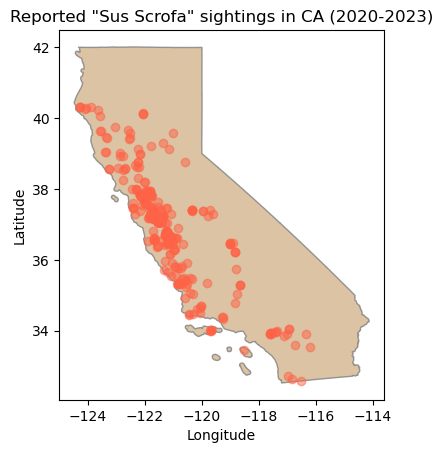

In [29]:
fig, ax = plt.subplots()

ca_boundary.plot(ax=ax,
                alpha = 0.8,
                color = "tan",
                edgecolor = "grey")

pigs_recent.plot(ax=ax,
                alpha=0.5,
                color="tomato")

ax.set_title('Reported "Sus Scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')